### Package and Data Imports

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the countries we're interested in (iShares MSCI ETFS)
etf_tickers = ['EWZ','EWW','ICOL','AGT']

#EWZ = Brazil, EWW = Mexico, ICOL = Colombia, AGT = Argentina

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
etf_data.head(10)

Symbols,EWZ,EWW,ICOL,AGT
Date,,,,
2019-01-02,39.076599,40.930561,10.823264,19.981745
2019-01-03,39.326599,40.417965,10.861307,19.928564
2019-01-04,40.211208,41.249729,11.184673,20.838524
2019-01-07,39.807369,41.733315,11.232227,21.330929
2019-01-08,40.288132,42.419998,11.489018,21.350624
2019-01-09,41.307354,42.893913,11.631680,21.984842
2019-01-10,41.249657,42.990631,11.612659,22.109913
2019-01-11,41.134274,42.806866,11.736300,22.138470
2019-01-14,41.326588,43.009972,11.755320,22.033094


### Comparing Currencies

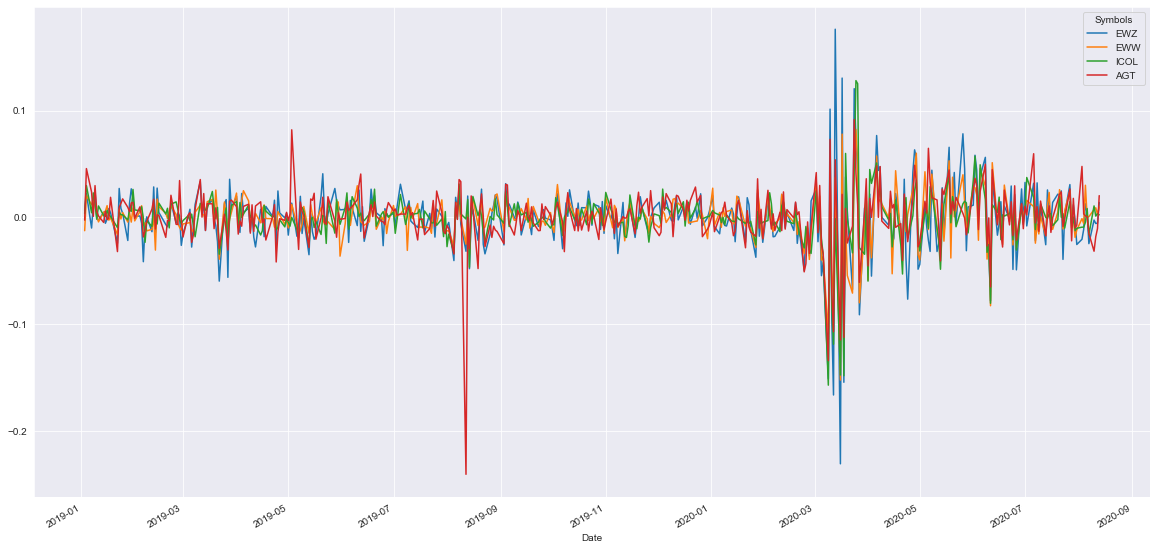

In [2]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
etf_data_pct_change = etf_data.pct_change() #calculating the percent change of the equity over the period
etf_data_pct_change.plot(grid=True, figsize=(20, 10));

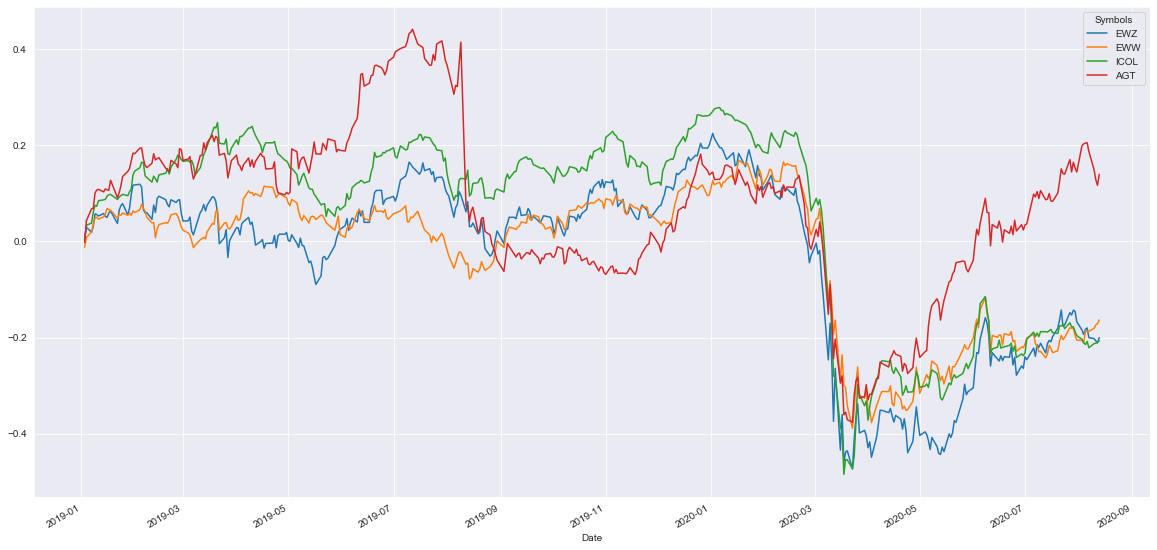

In [3]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + etf_data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages [Germany/UK/France/Russia]

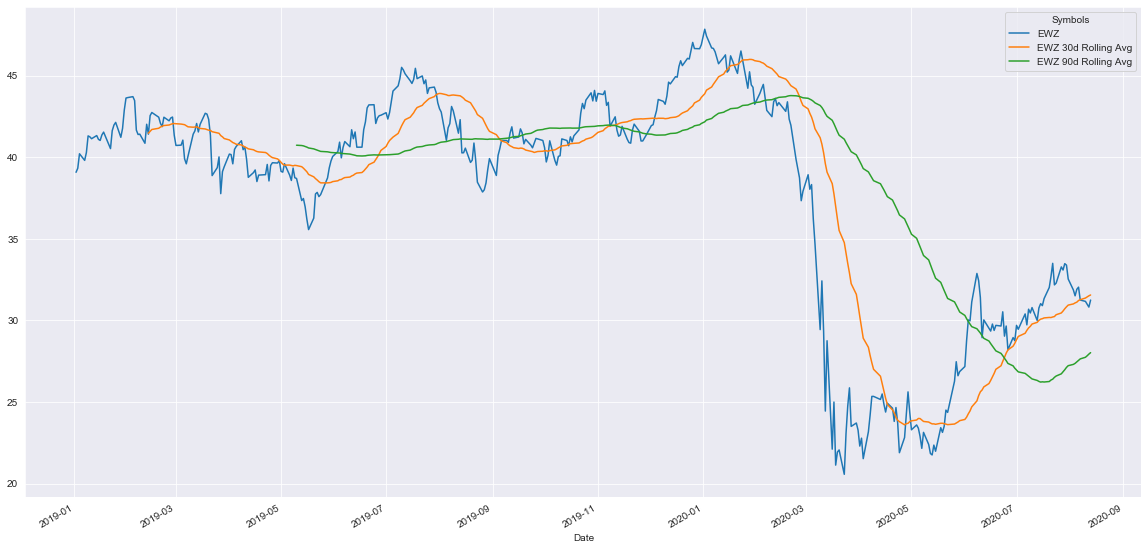

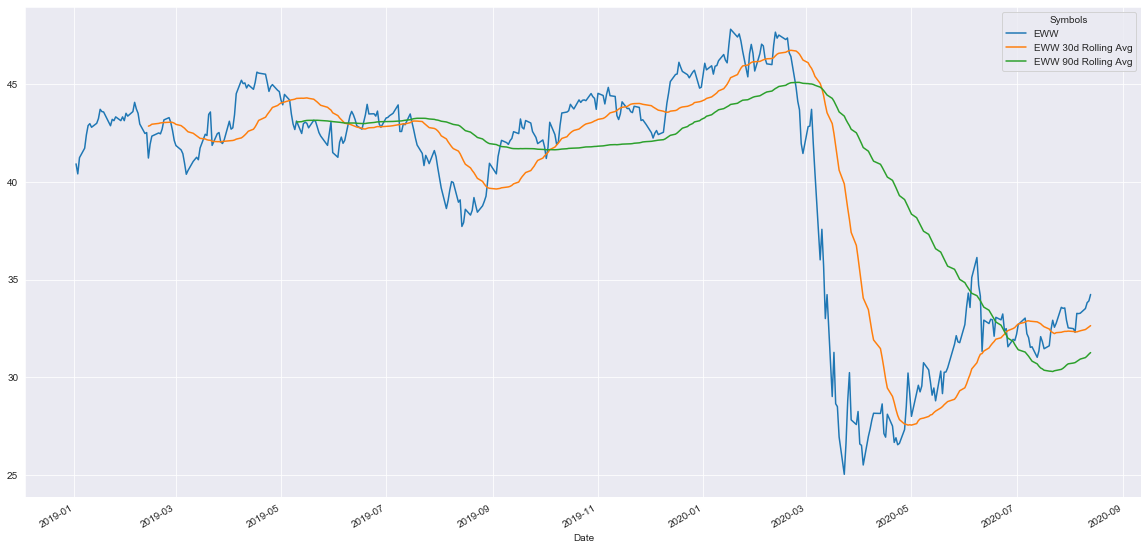

In [4]:
#Calculating 30 & 90 day rolling averages 

#Brazil (EWZ)
etf_data['EWZ 30d Rolling Avg'] = np.round(etf_data['EWZ'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWZ 90d Rolling Avg'] = np.round(etf_data['EWZ'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWZ', 'EWZ 30d Rolling Avg', 'EWZ 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#Mexico (EWW)
etf_data['EWW 30d Rolling Avg'] = np.round(etf_data['EWW'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWW 90d Rolling Avg'] = np.round(etf_data['EWW'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWW', 'EWW 30d Rolling Avg', 'EWW 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

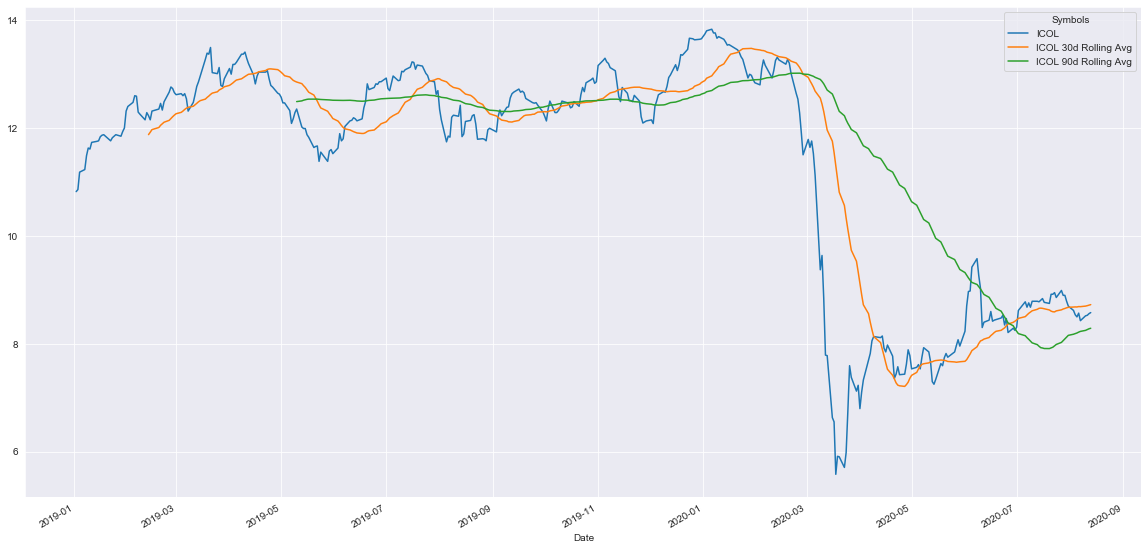

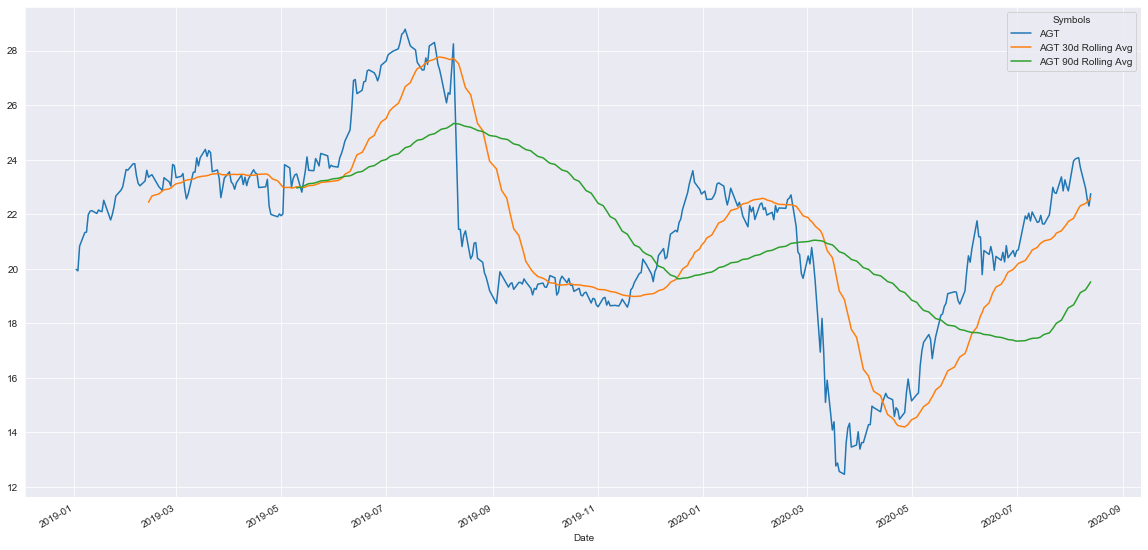

In [5]:
#Colombia (ICOL)
etf_data['ICOL 30d Rolling Avg'] = np.round(etf_data['ICOL'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['ICOL 90d Rolling Avg'] = np.round(etf_data['ICOL'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['ICOL', 'ICOL 30d Rolling Avg', 'ICOL 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#Argentina (AGT)
etf_data['AGT 30d Rolling Avg'] = np.round(etf_data['AGT'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['AGT 90d Rolling Avg'] = np.round(etf_data['AGT'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['AGT', 'AGT 30d Rolling Avg', 'AGT 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

### 30/90d Cumulative Return Rolling Averages

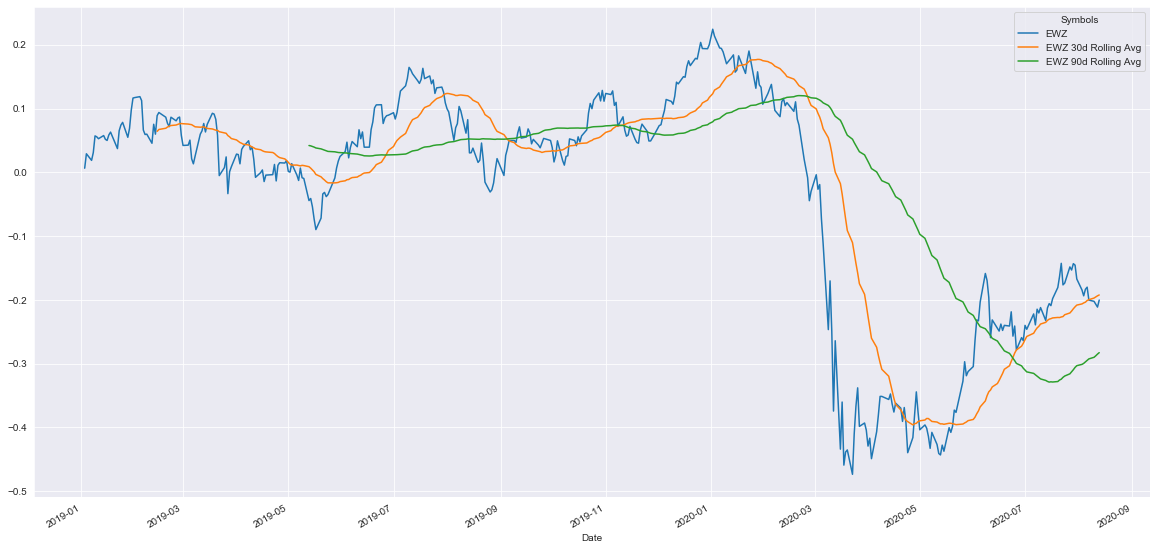

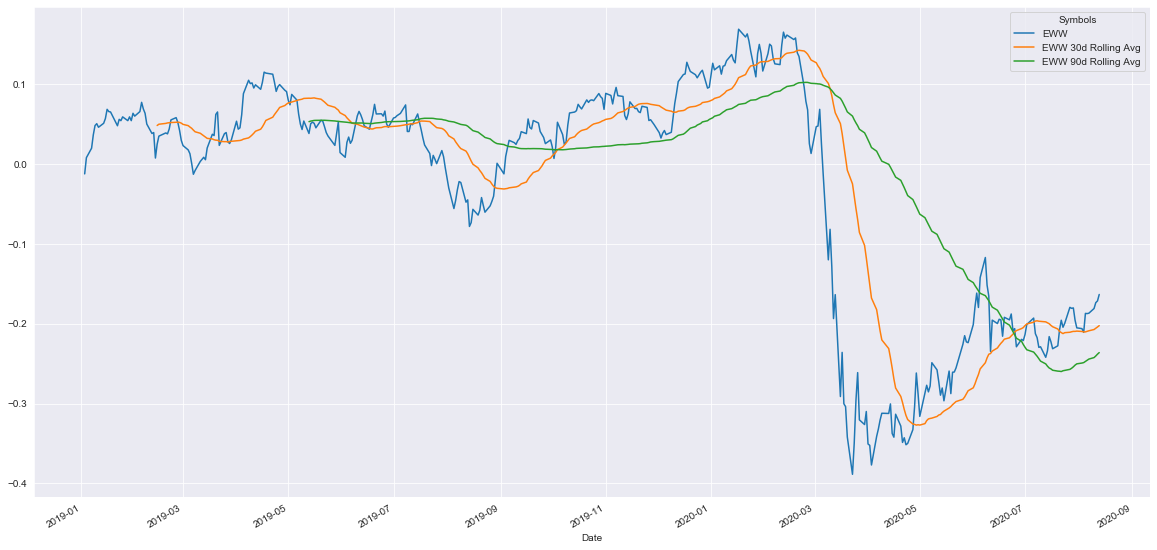

In [6]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#Brazil (EWZ)
cumulative_returns['EWZ 30d Rolling Avg'] = np.round(cumulative_returns['EWZ'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWZ 90d Rolling Avg'] = np.round(cumulative_returns['EWZ'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWZ', 'EWZ 30d Rolling Avg', 'EWZ 90d Rolling Avg']].plot(figsize=(20,10)) 

#Mexico (EWW)
cumulative_returns['EWW 30d Rolling Avg'] = np.round(cumulative_returns['EWW'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWW 90d Rolling Avg'] = np.round(cumulative_returns['EWW'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWW', 'EWW 30d Rolling Avg', 'EWW 90d Rolling Avg']].plot(figsize=(20,10)) 

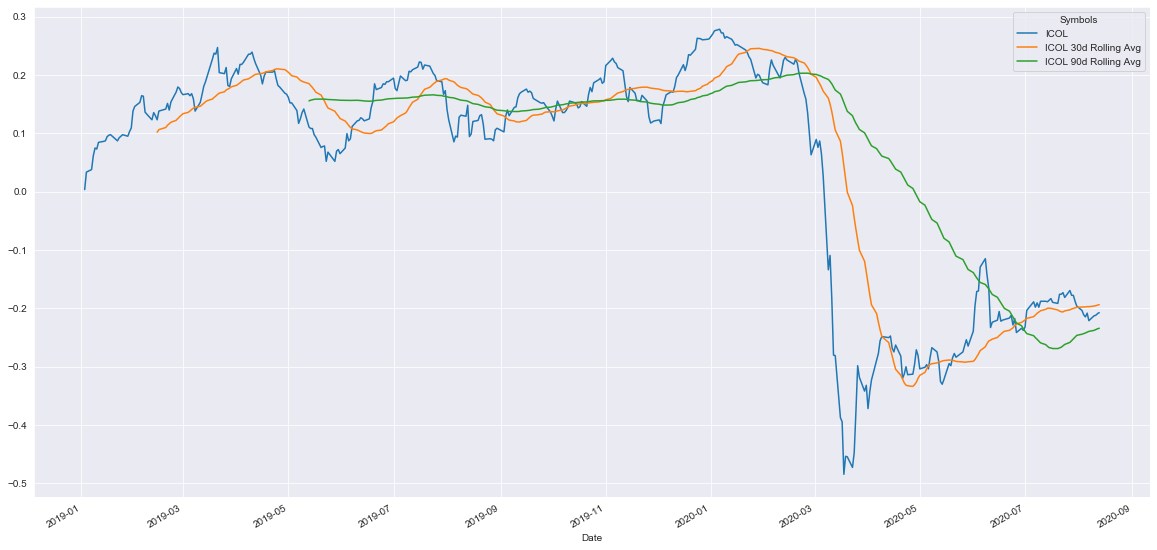

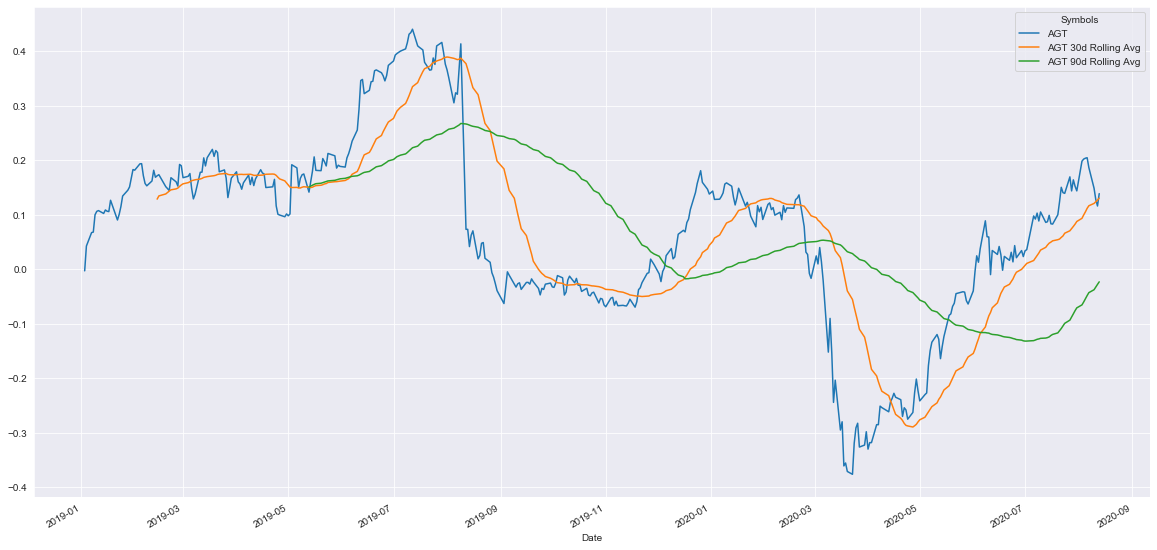

In [8]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#Colombia (ICOL)
cumulative_returns['ICOL 30d Rolling Avg'] = np.round(cumulative_returns['ICOL'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['ICOL 90d Rolling Avg'] = np.round(cumulative_returns['ICOL'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['ICOL', 'ICOL 30d Rolling Avg', 'ICOL 90d Rolling Avg']].plot(figsize=(20,10)) 

#Argentina (AGT)
cumulative_returns['AGT 30d Rolling Avg'] = np.round(cumulative_returns['AGT'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['AGT 90d Rolling Avg'] = np.round(cumulative_returns['AGT'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['AGT', 'AGT 30d Rolling Avg', 'AGT 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Nation's ETF

In [9]:
#Brazil (EWZ)
#Return
etf_data['EWZ Return'] = np.log(etf_data['EWZ']/etf_data['EWZ'].shift(1))
#30d moving volatility 
etf_data['EWZ Mov_Volatility'] = etf_data['EWZ'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Mexico (EWW)
#Return
etf_data['EWW Return'] = np.log(etf_data['EWW']/etf_data['EWW'].shift(1))
#30d moving volatility 
etf_data['EWW Mov_Volatility'] = etf_data['EWW'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Colombia (ICOL)
#Return
etf_data['ICOL Return'] = np.log(etf_data['ICOL']/etf_data['ICOL'].shift(1))
#30d moving volatility 
etf_data['ICOL Mov_Volatility'] = etf_data['ICOL'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Argentina (AGT)
#Return
etf_data['AGT Return'] = np.log(etf_data['AGT']/etf_data['AGT'].shift(1))
#30d moving volatility 
etf_data['AGT Mov_Volatility'] = etf_data['AGT'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

In [10]:
#Examining our complete DF/Spreadsheet/w.e
etf_data.info()
etf_data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2019-01-02 to 2020-08-13
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EWZ                   408 non-null    float64
 1   EWW                   408 non-null    float64
 2   ICOL                  408 non-null    float64
 3   AGT                   408 non-null    float64
 4   EWZ 30d Rolling Avg   379 non-null    float64
 5   EWZ 90d Rolling Avg   319 non-null    float64
 6   EWW 30d Rolling Avg   379 non-null    float64
 7   EWW 90d Rolling Avg   319 non-null    float64
 8   ICOL 30d Rolling Avg  379 non-null    float64
 9   ICOL 90d Rolling Avg  319 non-null    float64
 10  AGT 30d Rolling Avg   379 non-null    float64
 11  AGT 90d Rolling Avg   319 non-null    float64
 12  EWZ Return            407 non-null    float64
 13  EWZ Mov_Volatility    379 non-null    float64
 14  EWW Return            407 non-null    float64
 15  EWW 

Symbols,EWZ,EWW,ICOL,AGT,EWZ 30d Rolling Avg,EWZ 90d Rolling Avg,EWW 30d Rolling Avg,EWW 90d Rolling Avg,ICOL 30d Rolling Avg,ICOL 90d Rolling Avg,AGT 30d Rolling Avg,AGT 90d Rolling Avg,EWZ Return,EWZ Mov_Volatility,EWW Return,EWW Mov_Volatility,ICOL Return,ICOL Mov_Volatility,AGT Return,AGT Mov_Volatility
Date,,,,,,,,,,,,,,,,,,,,
2020-08-07,31.25,33.279999,8.43,23.712999,31.27433,27.64606,32.37900,30.92939,8.69000,8.23107,22.31610,19.12972,-0.024966,8.036914,0.000601,3.976005,-0.016471,1.185079,-0.015234,6.063356
2020-08-10,31.17,33.520000,8.52,22.959999,31.37333,27.74457,32.44433,31.00651,8.70033,8.25019,22.40113,19.23604,-0.002563,7.383877,0.007186,4.040919,0.010620,1.092085,-0.032270,5.762494
2020-08-11,30.99,33.820000,8.53,22.545000,31.44133,27.83569,32.50700,31.08773,8.70833,8.26603,22.46357,19.33511,-0.005792,6.960971,0.008910,4.231046,0.001173,1.022985,-0.018240,5.478484
2020-08-12,30.82,33.910000,8.56,22.306999,31.51000,27.93886,32.57467,31.18113,8.71867,8.27970,22.52540,19.43154,-0.005501,6.424227,0.002658,4.403322,0.003511,0.921213,-0.010613,5.072924
2020-08-13,31.25,34.240002,8.58,22.760000,31.56167,28.02848,32.64300,31.26192,8.72767,8.28944,22.59533,19.52568,0.013856,6.153755,0.009685,4.686175,0.002334,0.832613,0.020104,4.695500


### Visualizing Trends 

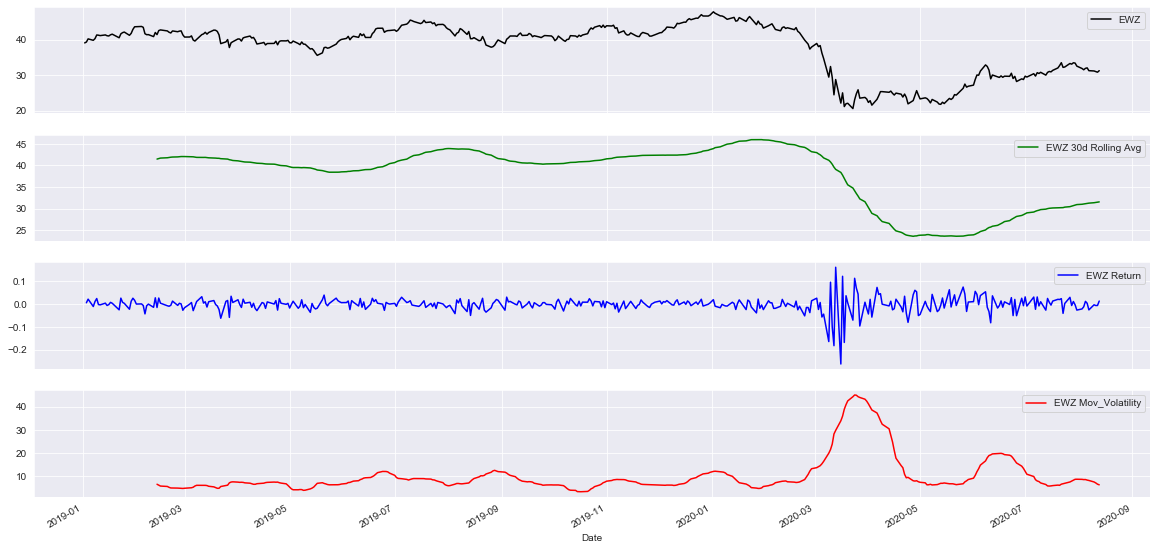

In [11]:
#Visualizing the results

#Brazil (EWZ)
etf_data[['EWZ','EWZ 30d Rolling Avg','EWZ Return','EWZ Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

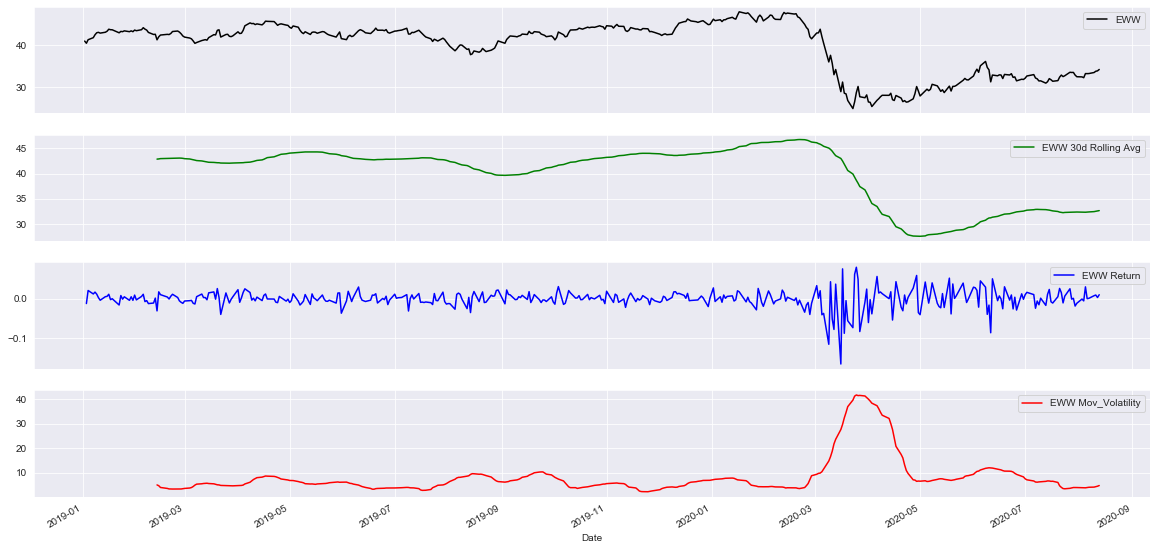

In [12]:
#Mexico (EWW)
etf_data[['EWW','EWW 30d Rolling Avg','EWW Return','EWW Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

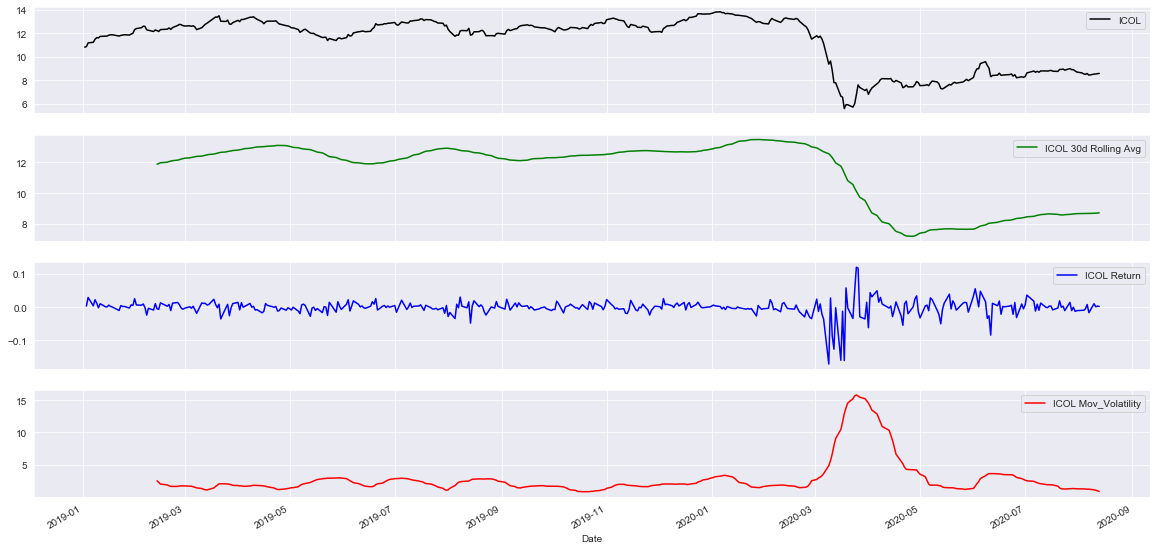

In [13]:
#Colombia (ICOL)
etf_data[['ICOL','ICOL 30d Rolling Avg','ICOL Return','ICOL Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

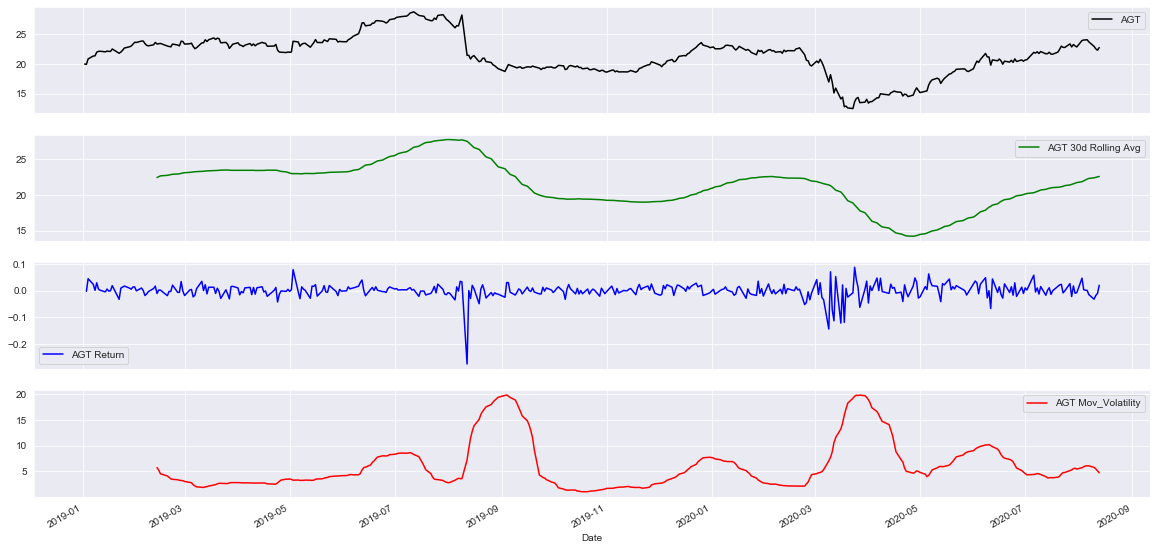

In [14]:
#Argentina (AGT)
etf_data[['AGT','AGT 30d Rolling Avg','AGT Return','AGT Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing ETF Portfolio Weights

In [15]:
#EWZ = Brazil, EWW = Mexico, ICOL = Colombia, AGT = Argentina

#Defining the ETFS we're building a portfolio out of
etf_tickers = ['EWZ','EWW','ICOL','AGT']

#Calculating number of currencies we're dealing with
size_portfolio = len(etf_tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
etf_returns = np.log(etf_data/etf_data.shift(1))

#Calculating average return over a year's worth of trading days
etf_returns.mean()*253

#Calculating covariance over a years's worth of trading days
etf_returns.cov()*253

Symbols,EWZ,EWW,ICOL,AGT
Symbols,,,,
EWZ,0.273804,0.150553,0.146035,0.150411
EWW,0.150553,0.127186,0.102778,0.099220
ICOL,0.146035,0.102778,0.145576,0.099914
AGT,0.150411,0.099220,0.099914,0.188783


### Calculating Expected Return, Var & Vol for One Possible Set of ETF Portfolio Weights

In [16]:
#Creating random position weights
weights = np.random.random(size_portfolio) #creating random position percentages
weights = weights/np.sum(weights) #scaling weights
weights

array([0.28868704, 0.4016889 , 0.13004464, 0.17957942])

In [17]:
#Calculating expected portfolio return with random weights
np.sum(etf_returns.mean()*weights)*253

-0.08933070000219086

In [18]:
#Calculating expected portfolio variance with random weights

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))

0.14308682760173153

In [19]:
#Calculating expected portfolio volatility with random weights
np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))

0.37826819533464817

### Calculating Expected Return, Var & Vol for Ten Thousand [10000] Potential ETF Portfolios Via Monte Carlo

In [20]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (10000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(etf_returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

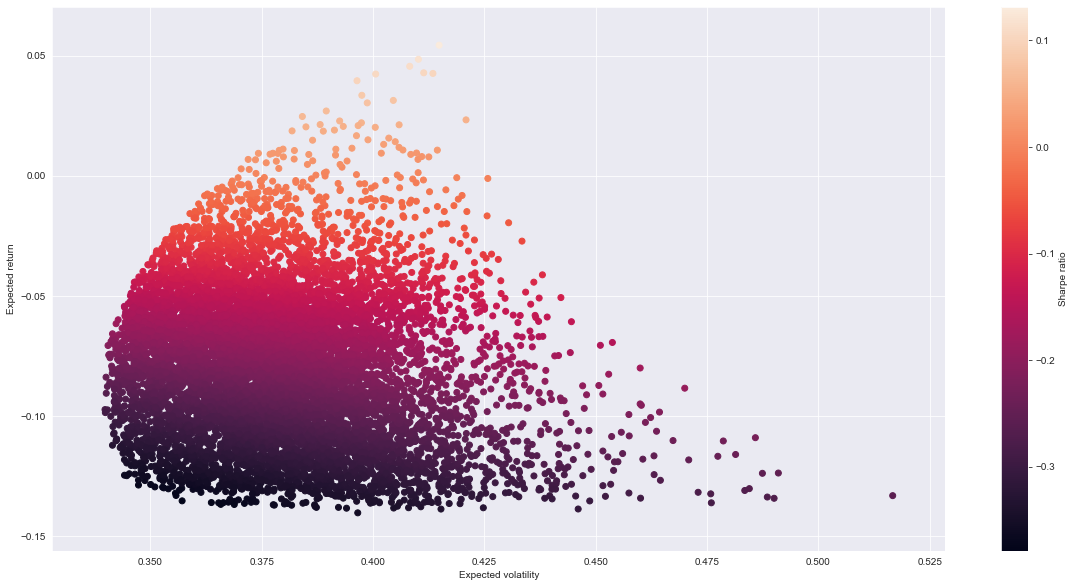

In [21]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Portfolio Weightings Mathematically

In [22]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(etf_returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [23]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [25]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWZ,EWW,ICOL,AGT]')
print((opts_Sharpe['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO ETF WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWZ,EWW,ICOL,AGT]
[0. 0. 0. 1.]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO ETF WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.08092614 0.43449119 0.18625495]


In [27]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [29]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWZ,EWW,ICOL,AGT]')
print((opts_variance['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE ETF WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWZ,EWW,ICOL,AGT]
[0.      0.5285  0.29775 0.17375]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE ETF WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[-0.08840518  0.33950921 -0.26039112]


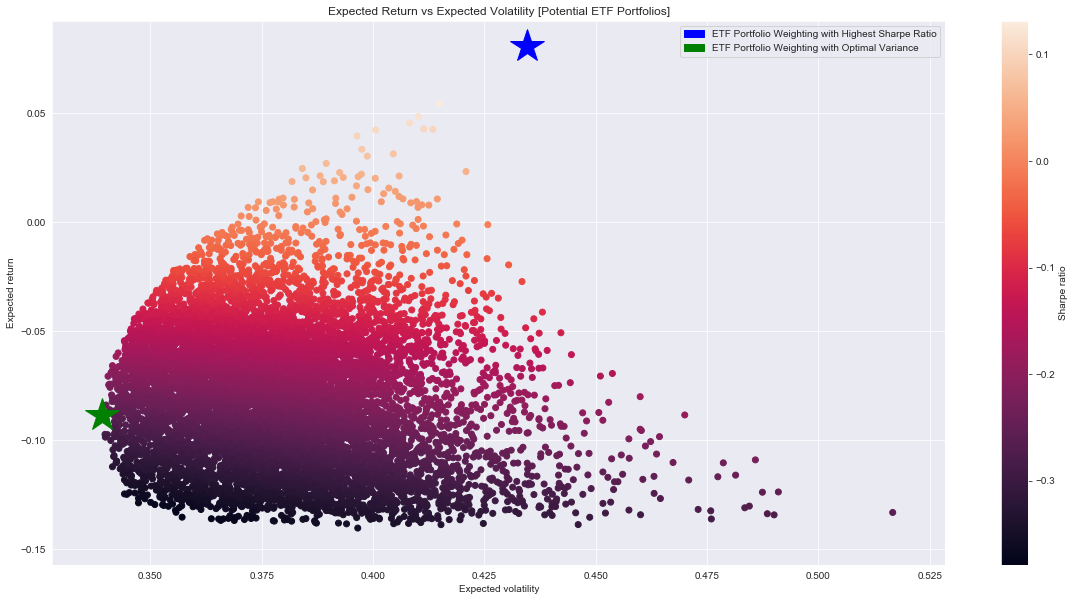

In [30]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'b*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
blue = mpatches.Patch(color='b', label='ETF Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='ETF Portfolio Weighting with Optimal Variance')
plt.legend(handles=[blue,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential ETF Portfolios]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');